In [1]:
#Import librari
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read diamond dataset
df = pd.read_csv('diamonds.csv')

In [3]:
# Show dataset
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## 1. Identify and fix incorrectness of data type assignment

In [4]:
# Menampilkan tipe data awal 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.9+ MB


In [124]:
# Tipe data tidak di ubah karena tipe data sudah sesuai

## 2. Identify and fix missing values

In [5]:
# Identify and fix missing value
# Menghitung nilai hilang per kolom
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
# Tedapat banyak nilai 0.00 pada atribut x
df.sort_values(by=["x"], ascending=True).head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
31600,31601,0.20,Premium,D,VS2,62.3,60.0,367,3.73,3.68,2.31
31596,31597,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33


In [7]:
# Tedapat banyak nilai 0.00 pada atribut y
df.sort_values(by=["y"], ascending=True).head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00
31600,31601,0.20,Premium,D,VS2,62.3,60.0,367,3.73,3.68,2.31
31598,31599,0.20,Very Good,E,VS2,63.4,59.0,367,3.74,3.71,2.36
31596,31597,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33


In [8]:
# Tedapat banyak nilai 0.00 pada atribut z
df.sort_values(by=["z"], ascending=True).head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
27503,27504,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.0
26123,26124,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0


In [9]:
# Hasilnya missing value tidak ada tetapi banyak terdapat nilai 0.00 pada atribut x, y dan z

## 3. Identify and fix Data Outlier &  Identify and fix noise or inconsistent data


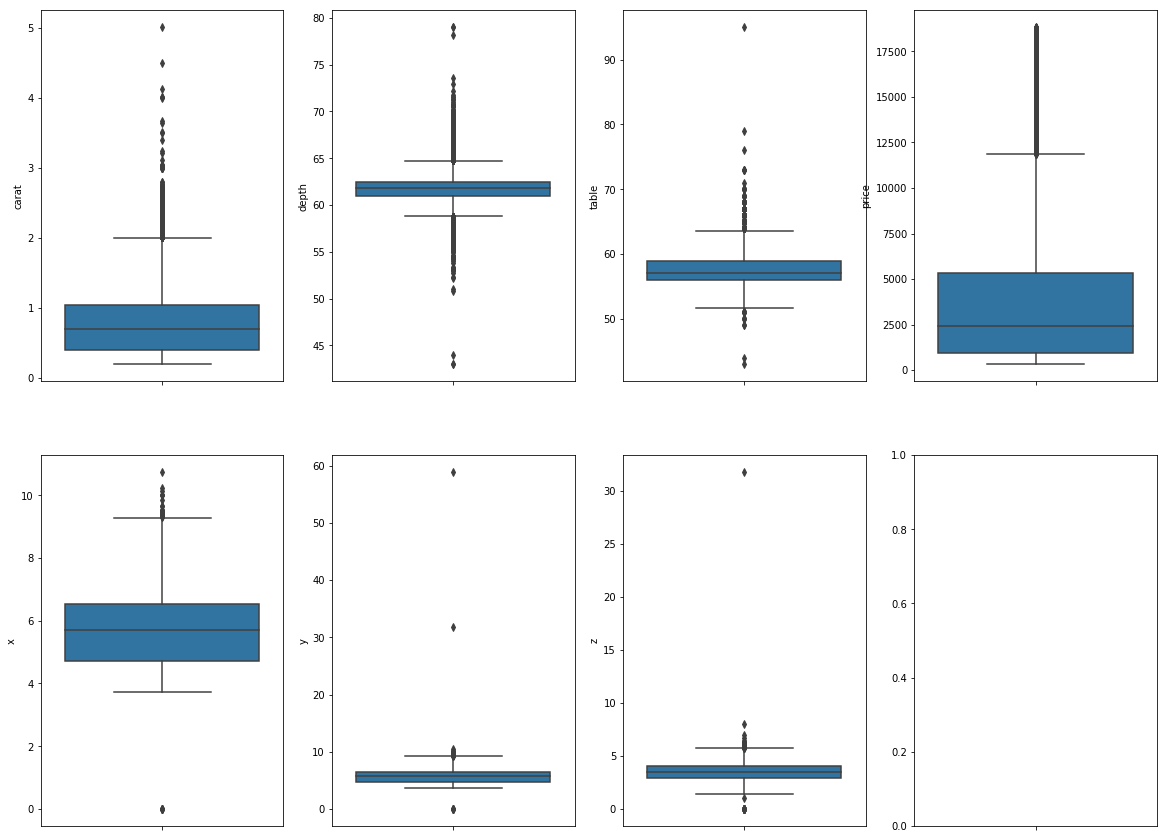

In [130]:
# Identify and fix data outliers
# Data visualisasi data outlier dataset awal

f, axes = plt.subplots(2, 4, figsize=(20, 15), sharex = True)

sb.boxplot(y = df.iloc[:,1], ax=axes[0,0])
sb.boxplot(y = df.iloc[:,5], ax=axes[0,1])
sb.boxplot(y = df.iloc[:,6], ax=axes[0,2])
sb.boxplot(y = df.iloc[:,7], ax=axes[0,3])
sb.boxplot(y = df.iloc[:,8], ax=axes[1,0])
sb.boxplot(y = df.iloc[:,9], ax=axes[1,1])
sb.boxplot(y = df.iloc[:,10], ax=axes[1,2])

In [131]:
# Dilihat dari grafik boxplot diatas, terdapat banyak data outlier

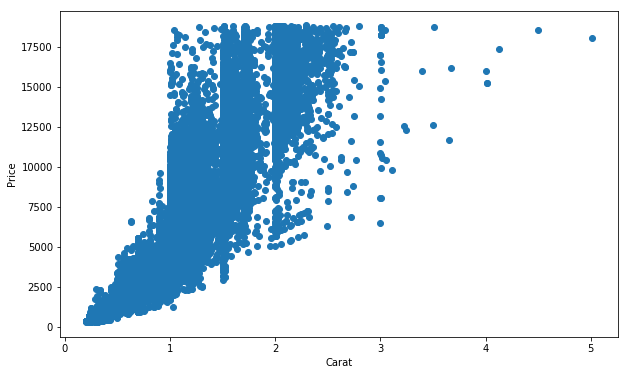

In [132]:
# Identify and fix data outliers
# Scatter plot price v/s carat
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['carat'], df['price'])
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
plt.show()

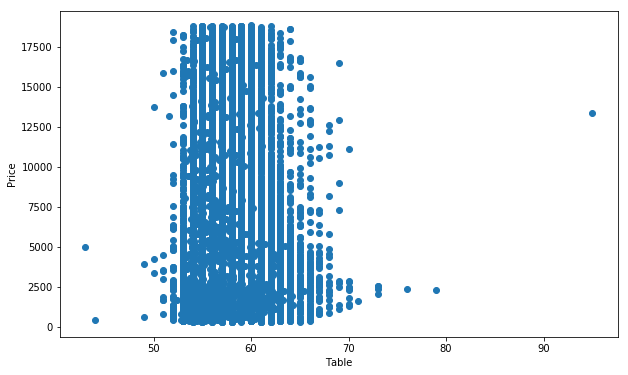

In [133]:
# Identify and fix data outliers
# Scatter plot price v/s table
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['table'], df['price'])
ax.set_xlabel('Table')
ax.set_ylabel('Price')
plt.show()

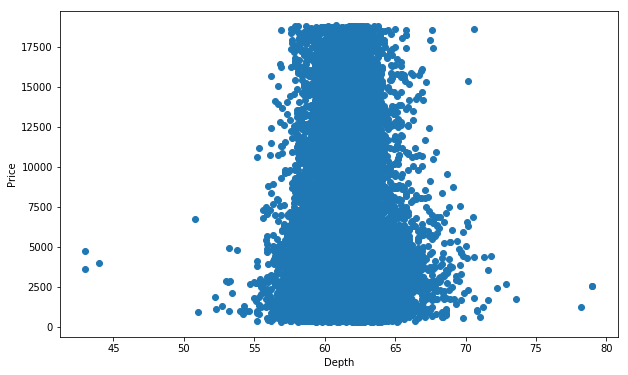

In [134]:
# Identify and fix data outliers
# Scatter plot price v/s depth
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['depth'], df['price'])
ax.set_xlabel('Depth')
ax.set_ylabel('Price')
plt.show()

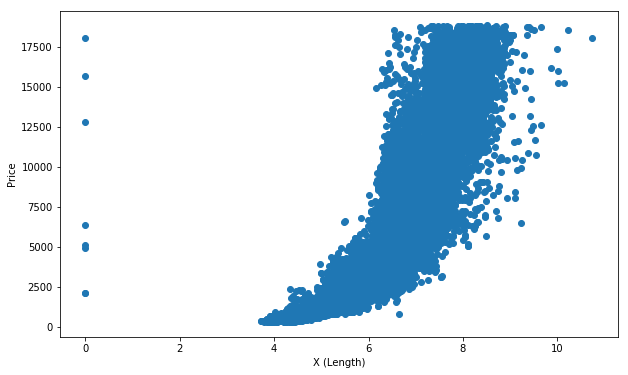

In [135]:
# Identify and fix data outliers
# Scatter plot price v/s x
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['x'], df['price'])
ax.set_xlabel('X (Length)')
ax.set_ylabel('Price')
plt.show()

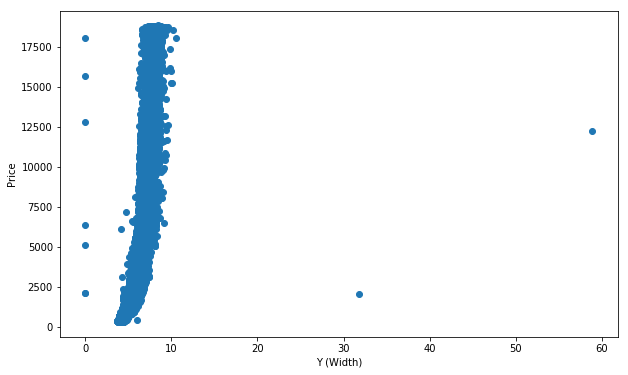

In [136]:
# Identify and fix data outliers
# Scatter plot price v/s y
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['y'], df['price'])
ax.set_xlabel('Y (Width)')
ax.set_ylabel('Price')
plt.show()

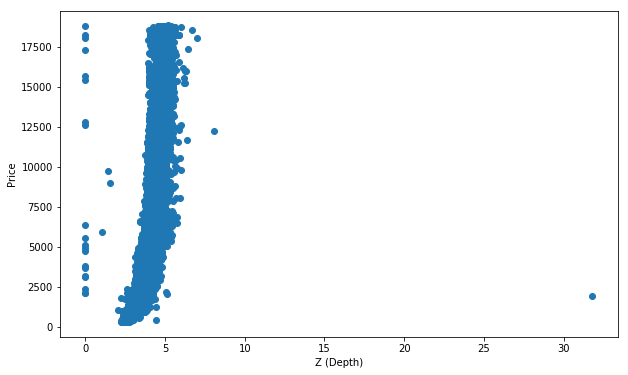

In [137]:
# Identify and fix data outliers
# Scatter plot price v/s z
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['z'], df['price'])
ax.set_xlabel('Z (Depth)')
ax.set_ylabel('Price')
plt.show()

In [10]:
# Melihat sccater plot di atas, kita bisa sebagian besar titik data berada di sisi kiri bawah tetapi ada titik 
# yang jauh dari populasi seperti sudut kanan atas.

In [11]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df2= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [12]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
df3= df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
df4= df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3 - Q1
df5= df4[~((df4 < (Q1 - 1.5 * IQR)) |(df4 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df5.quantile(0.25)
Q3 = df5.quantile(0.75)
IQR = Q3 - Q1
df6= df5[~((df5 < (Q1 - 1.5 * IQR)) |(df5 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df6.quantile(0.25)
Q3 = df6.quantile(0.75)
IQR = Q3 - Q1
df7= df6[~((df6 < (Q1 - 1.5 * IQR)) |(df6 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df7.quantile(0.25)
Q3 = df7.quantile(0.75)
IQR = Q3 - Q1
df8= df7[~((df7 < (Q1 - 1.5 * IQR)) |(df7 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df8.quantile(0.25)
Q3 = df8.quantile(0.75)
IQR = Q3 - Q1
df9= df8[~((df8 < (Q1 - 1.5 * IQR)) |(df8 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df9.quantile(0.25)
Q3 = df9.quantile(0.75)
IQR = Q3 - Q1
df10= df9[~((df9 < (Q1 - 1.5 * IQR)) |(df9 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
# Identify and fix outliers
# Menghapus data outlier
# IQR score 
Q1 = df10.quantile(0.25)
Q3 = df10.quantile(0.75)
IQR = Q3 - Q1
df15= df10[~((df10 < (Q1 - 1.5 * IQR)) |(df10 > (Q3 + 1.5 * IQR))).any(axis=1)]

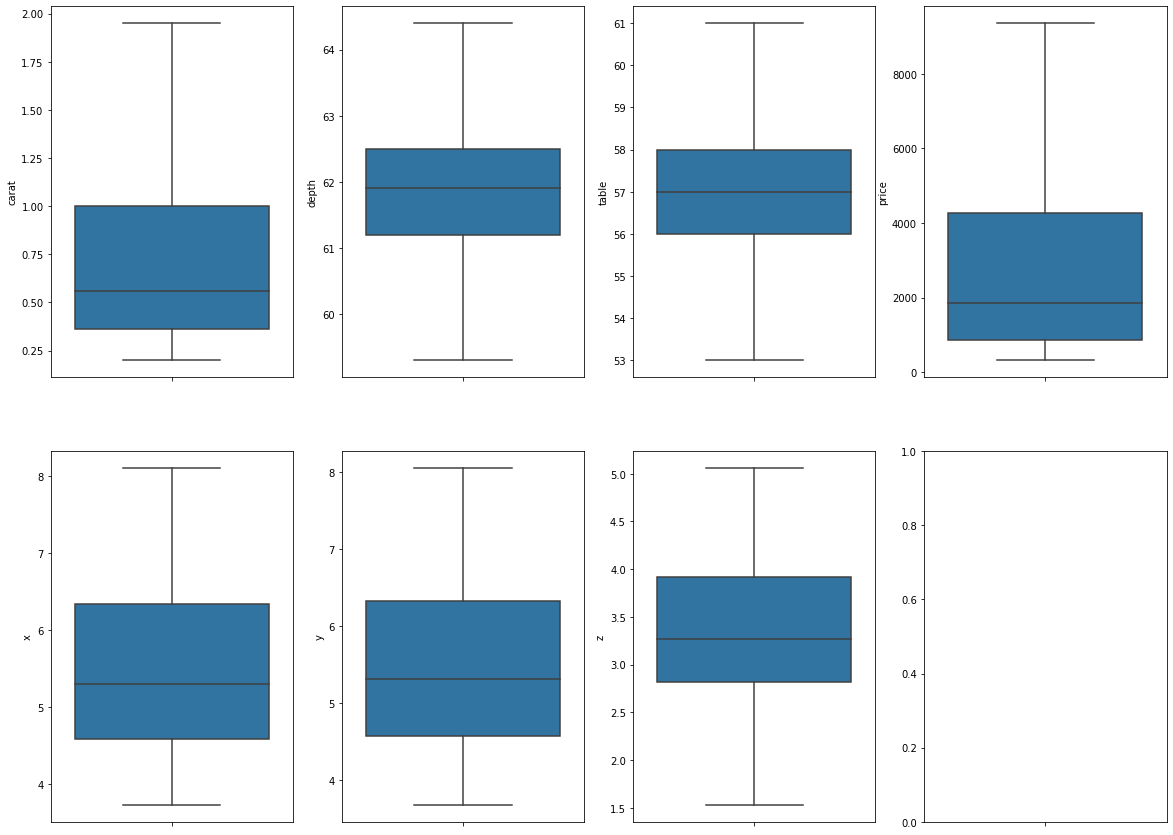

In [21]:
# Identify and fix data outliers
# Data visualisasi data outlier sebelum di hapus

f, axes = plt.subplots(2, 4, figsize=(20, 15), sharex = True)

sb.boxplot(y = df15.iloc[:,1], ax=axes[0,0])
sb.boxplot(y = df15.iloc[:,5], ax=axes[0,1])
sb.boxplot(y = df15.iloc[:,6], ax=axes[0,2])
sb.boxplot(y = df15.iloc[:,7], ax=axes[0,3])
sb.boxplot(y = df15.iloc[:,8], ax=axes[1,0])
sb.boxplot(y = df15.iloc[:,9], ax=axes[1,1])
sb.boxplot(y = df15.iloc[:,10], ax=axes[1,2])

In [152]:
# Dilihat dari grafik boxplot diatas, sudah tidak terdapat data outlier lagi

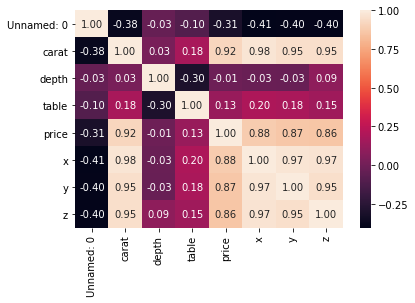

In [153]:
# HeatMap
# Kita dapat menggunakan heatmap untuk melihat visualisasi dari korelasi antar attribute

corr = df.corr()
sb.heatmap(corr, annot = True, fmt='.2f')

In [154]:
# Atribut yang memiliki korelasi dengan atribut price yaitu carat,x, y, dan z

## 4. Identify and fix imbalanced dataset

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Cut')]

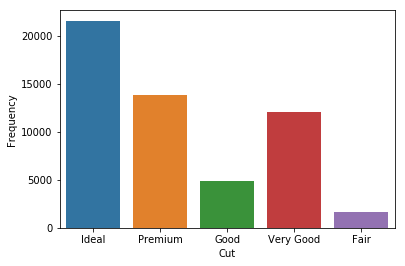

In [155]:
sns.countplot(df['cut']).set(xlabel='Cut', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Cut')]

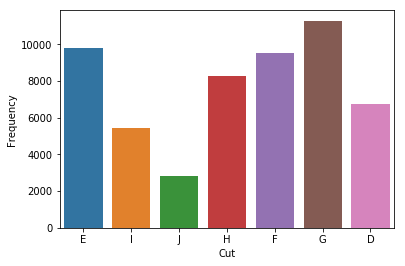

In [156]:
sns.countplot(df['color']).set(xlabel='Cut', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Clarity')]

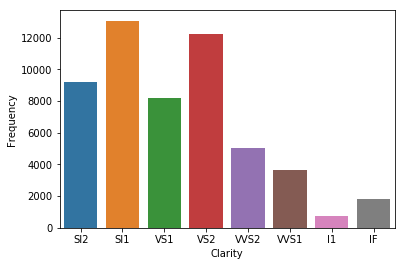

In [157]:
sns.countplot(df['clarity']).set(xlabel='Clarity', ylabel='Frequency')

## 5. Categorical encoding

In [22]:
# Categorical endcoding for multivalues attributes dataset akhir
# On Hot Encoding
df_final = pd.get_dummies(df15, prefix=['cut', 'color', 'clarity'])
df_final.head(5)

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,...,0,1,0,0,0,1,0,0,0,0
5,6,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,...,0,1,0,0,0,0,0,0,0,1


## 6. Data Normalization

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(df_final[['carat','depth','x','y','z','table']]),
                           columns=['carat','depth','x','y','z','table'],index=df_final.index)

df_final = df_final.copy(deep=True)
df_final[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]

df_final.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,-1.290820,-0.345314,-1.127396,326,-1.618274,-1.601686,-1.639075,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,-1.349566,-2.024088,2.151585,326,-1.682923,-1.753444,-1.847469,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,-1.114580,0.543448,0.512094,334,-1.348899,-1.330688,-1.291752,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,-1.055834,1.432210,0.512094,335,-1.198049,-1.200610,-1.083359,0,1,...,0,1,0,0,0,1,0,0,0,0
5,6,-1.261447,0.938453,-0.034402,336,-1.629049,-1.623365,-1.552244,0,0,...,0,1,0,0,0,0,0,0,0,1


## 7. Machine Learning

In [36]:
from sklearn import linear_model
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

## 8. K Fold Valodation

### Random Forest regressor


Fold ke :  1  Random Forest Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy                       :  0.9801548345585299
Mean Absolute Error (MAE)      :  179.32849269015549
Mean Squared Error (MSE)       :  100586.58769915233
Root Mean Squared Error (RMSE) :  317.1538864638936

Fold ke :  2  Random Forest Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy                       :  0.9814130470904916
Mean Absolute Error (MAE)      :  179.6834664808794
Mean Squared Error (MSE)       :  97094.38125105313
Root Mean Squared Error (RMSE) :  311.59971317549883

Fold ke :  3  Random Forest Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy                       :  0.9804210130435251
Mean Absolute Error (MAE)      :  182.8930800046447
Mean Squared Error (MSE)       :  103642.28343676814
Root Mean Squared Error (RMSE) :  321.9352162109143

Fold ke :  4  Random Forest Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy                       :  0.9814690127115112
Mean Absolute Error (MAE)      :  178.85053897662175
Mean Squared Error (MSE)       :  98595.41446717727
Root Mean Squared Error (RMSE) :  313.9990676215094

Fold ke :  5  Random Forest Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy                       :  0.9807438861138277
Mean Absolute Error (MAE)      :  179.64950813190217
Mean Squared Error (MSE)       :  100908.92910975759
Root Mean Squared Error (RMSE) :  317.6616582305104

Nilai Rata-Rata Accuracy                       :  0.9808403587035771
Nilai Rata-Rata Mean Absolute Error (MAE)      :  180.08101725684068
Nilai Rata-Rata Mean Squared Error (MSE)       :  100165.51919278168
Nilai Rata-Rata Root Mean Squared Error (RMSE) :  316.4699083404653


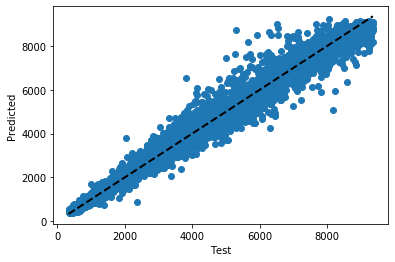

In [34]:
# Random Forest Regressor

X3 = df_final[["carat", "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal","color_D","color_E", 
         "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", 
         "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2","table","depth","x","y","z"]].values
Y3 = df_final['price'].values

r2sum=0
rmsesum=0
maesum=0
msesum=0
i = 1
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in kf.split(X3):
    print('\nFold ke : ',i,' Random Forest Regressor ')
    x_train = X3[train]
    y_train = Y3[train]
    x_test  = X3[test]
    y_test  = Y3[test]

    clf = RandomForestRegressor()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    r2sum=r2sum +accuracy
    print('Accuracy                       : ',accuracy)
    MAE = mean_absolute_error(y_test, y_pred)
    maesum=maesum +MAE
    print('Mean Absolute Error (MAE)      : ',MAE)
    MSE = mean_squared_error(y_test, y_pred)
    msesum=msesum +MSE
    print('Mean Squared Error (MSE)       : ',MSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsesum=rmsesum +rmse
    print('Root Mean Squared Error (RMSE) : ',rmse)
    i+=1

r2LR=r2sum/5
print('')
print('Nilai Rata-Rata Accuracy                       : ',r2LR)
MAELR=maesum/5
print('Nilai Rata-Rata Mean Absolute Error (MAE)      : ',MAELR)
MSELR=msesum/5
print('Nilai Rata-Rata Mean Squared Error (MSE)       : ',MSELR)
rmseLR=rmsesum/5
print('Nilai Rata-Rata Root Mean Squared Error (RMSE) : ',rmseLR)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')
plt.show()


In [167]:
# Random Forest Regressor

X3 = df_final[["carat", "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal","color_D","color_E", 
         "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", 
         "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2","table","depth","x","y","z"]].values
Y3 = df_final['price'].values

r2sum=0
rmsesum=0
maesum=0
msesum=0
i = 1
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in kf.split(X3):
    print('\nFold ke : ',i,' Random Forest Regressor ')
    x_train = X3[train]
    y_train = Y3[train]
    x_test  = X3[test]
    y_test  = Y3[test]

    clf = RandomForestRegressor(n_estimators=10000, bootstrap =True)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    r2sum=r2sum +accuracy
    print('Accuracy                       : ',accuracy)
    MAE = mean_absolute_error(y_test, y_pred)
    maesum=maesum +MAE
    print('Mean Absolute Error (MAE)      : ',MAE)
    MSE = mean_squared_error(y_test, y_pred)
    msesum=msesum +MSE
    print('Mean Squared Error (MSE)       : ',MSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsesum=rmsesum +rmse
    print('Root Mean Squared Error (RMSE) : ',rmse)
    i+=1

r2LR=r2sum/5
print('')
print('Nilai Rata-Rata Accuracy                       : ',r2LR)
MAELR=maesum/5
print('Nilai Rata-Rata Mean Absolute Error (MAE)      : ',MAELR)
MSELR=msesum/5
print('Nilai Rata-Rata Mean Squared Error (MSE)       : ',MSELR)
rmseLR=rmsesum/5
print('Nilai Rata-Rata Root Mean Squared Error (RMSE) : ',rmseLR)



Fold ke :  1  Random Forest Regressor 
Accuracy                       :  0.9819311543997508
Mean Absolute Error (MAE)      :  170.02177613246624
Mean Squared Error (MSE)       :  91583.18825571226
Root Mean Squared Error (RMSE) :  302.62714395062494

Fold ke :  2  Random Forest Regressor 
Accuracy                       :  0.9829497292962448
Mean Absolute Error (MAE)      :  169.37418674085717
Mean Squared Error (MSE)       :  89067.07259677771
Root Mean Squared Error (RMSE) :  298.44107055962945

Fold ke :  3  Random Forest Regressor 
Accuracy                       :  0.982139274081778
Mean Absolute Error (MAE)      :  173.46568808393596
Mean Squared Error (MSE)       :  94546.58824370964
Root Mean Squared Error (RMSE) :  307.48428942583337

Fold ke :  4  Random Forest Regressor 
Accuracy                       :  0.9836218336197591
Mean Absolute Error (MAE)      :  167.4680490206156
Mean Squared Error (MSE)       :  87141.18019363945
Root Mean Squared Error (RMSE) :  295.1968499046686

In [26]:
# Random Forest Regressor

X3 = df_final[["carat", "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal","color_D","color_E", 
         "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", 
         "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2","table","depth","x","y","z"]].values
Y3 = df_final['price'].values

r2sum=0
rmsesum=0
maesum=0
msesum=0
i = 1
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in kf.split(X3):
    print('\nFold ke : ',i,' Random Forest Regressor ')
    x_train = X3[train]
    y_train = Y3[train]
    x_test  = X3[test]
    y_test  = Y3[test]

    clf = RandomForestRegressor(n_estimators=100, bootstrap =True,min_samples_split= 12, min_samples_leaf=5,max_features= 3, max_depth= 80)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    r2sum=r2sum +accuracy
    print('Accuracy                       : ',accuracy)
    MAE = mean_absolute_error(y_test, y_pred)
    maesum=maesum +MAE
    print('Mean Absolute Error (MAE)      : ',MAE)
    MSE = mean_squared_error(y_test, y_pred)
    msesum=msesum +MSE
    print('Mean Squared Error (MSE)       : ',MSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsesum=rmsesum +rmse
    print('Root Mean Squared Error (RMSE) : ',rmse)
    i+=1

r2LR=r2sum/5
print('')
print('Nilai Rata-Rata Accuracy                       : ',r2LR)
MAELR=maesum/5
print('Nilai Rata-Rata Mean Absolute Error (MAE)      : ',MAELR)
MSELR=msesum/5
print('Nilai Rata-Rata Mean Squared Error (MSE)       : ',MSELR)
rmseLR=rmsesum/5
print('Nilai Rata-Rata Root Mean Squared Error (RMSE) : ',rmseLR)



Fold ke :  1  Random Forest Regressor 
Accuracy                       :  0.9713861510696055
Mean Absolute Error (MAE)      :  224.6803314068283
Mean Squared Error (MSE)       :  145031.26382776178
Root Mean Squared Error (RMSE) :  380.8297044976426

Fold ke :  2  Random Forest Regressor 
Accuracy                       :  0.9730041831119225
Mean Absolute Error (MAE)      :  227.62670423558524
Mean Squared Error (MSE)       :  141020.54004633214
Root Mean Squared Error (RMSE) :  375.5270164000616

Fold ke :  3  Random Forest Regressor 
Accuracy                       :  0.9718474458786429
Mean Absolute Error (MAE)      :  230.54683195891667
Mean Squared Error (MSE)       :  149026.8623295505
Root Mean Squared Error (RMSE) :  386.03997504086345

Fold ke :  4  Random Forest Regressor 
Accuracy                       :  0.9723654933436913
Mean Absolute Error (MAE)      :  227.09260512532396
Mean Squared Error (MSE)       :  147031.3262298356
Root Mean Squared Error (RMSE) :  383.446640655301

### MLP Regressor

In [27]:
# MLP Regressor

X3 = df_final[["carat", "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal","color_D","color_E", 
         "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", 
         "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2","table","depth","x","y","z"]].values
Y3 = df_final['price'].values

r2sum=0
rmsesum=0
maesum=0
msesum=0
i = 1
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in kf.split(X3):
    print('\nFold ke : ',i,' MLP Regressor ')
    x_train = X3[train]
    y_train = Y3[train]
    x_test  = X3[test]
    y_test  = Y3[test]

    clf = MLPRegressor()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    r2sum=r2sum +accuracy
    print('Accuracy                       : ',accuracy)
    MAE = mean_absolute_error(y_test, y_pred)
    maesum=maesum +MAE
    print('Mean Absolute Error (MAE)      : ',MAE)
    MSE = mean_squared_error(y_test, y_pred)
    msesum=msesum +MSE
    print('Mean Squared Error (MSE)       : ',MSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsesum=rmsesum +rmse
    print('Root Mean Squared Error (RMSE) : ',rmse)
    i+=1

r2LR=r2sum/5
print('')
print('Nilai Rata-Rata Accuracy                       : ',r2LR)
MAELR=maesum/5
print('Nilai Rata-Rata Mean Absolute Error (MAE)      : ',MAELR)
MSELR=msesum/5
print('Nilai Rata-Rata Mean Squared Error (MSE)       : ',MSELR)
rmseLR=rmsesum/5
print('Nilai Rata-Rata Root Mean Squared Error (RMSE) : ',rmseLR)



Fold ke :  1  MLP Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy                       :  0.9780781333026534
Mean Absolute Error (MAE)      :  208.32852951006
Mean Squared Error (MSE)       :  111112.4910288697
Root Mean Squared Error (RMSE) :  333.3354032035447

Fold ke :  2  MLP Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy                       :  0.977362243363217
Mean Absolute Error (MAE)      :  214.3418335900045
Mean Squared Error (MSE)       :  118254.93851851077
Root Mean Squared Error (RMSE) :  343.88215789498406

Fold ke :  3  MLP Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy                       :  0.9770380460287171
Mean Absolute Error (MAE)      :  215.35976906234424
Mean Squared Error (MSE)       :  121550.17759826919
Root Mean Squared Error (RMSE) :  348.6404703964661

Fold ke :  4  MLP Regressor 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy                       :  0.979090506483828
Mean Absolute Error (MAE)      :  208.50742450656452
Mean Squared Error (MSE)       :  111250.4232737974
Root Mean Squared Error (RMSE) :  333.54223611680334

Fold ke :  5  MLP Regressor 
Accuracy                       :  0.9771986073602068
Mean Absolute Error (MAE)      :  213.9400219700327
Mean Squared Error (MSE)       :  119487.4587413443
Root Mean Squared Error (RMSE) :  345.66958029503303

Nilai Rata-Rata Accuracy                       :  0.9777535073077244
Nilai Rata-Rata Mean Absolute Error (MAE)      :  212.0955157278012
Nilai Rata-Rata Mean Squared Error (MSE)       :  116331.09783215828
Nilai Rata-Rata Root Mean Squared Error (RMSE) :  341.0139695813662


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Linear Regression

In [31]:
# Linear Regression

X3 = df_final[["carat", "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal","color_D","color_E", 
         "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", 
         "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2","table","depth","x","y","z"]].values
Y3 = df_final['price'].values

r2sum=0
rmsesum=0
maesum=0
msesum=0
i = 1
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in kf.split(X3):
    print('\nFold ke : ',i,' Linear Regression ')
    x_train = X3[train]
    y_train = Y3[train]
    x_test  = X3[test]
    y_test  = Y3[test]

    clf = LinearRegression()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    r2sum=r2sum +accuracy
    print('Accuracy                       : ',accuracy)
    MAE = mean_absolute_error(y_test, y_pred)
    maesum=maesum +MAE
    print('Mean Absolute Error (MAE)      : ',MAE)
    MSE = mean_squared_error(y_test, y_pred)
    msesum=msesum +MSE
    print('Mean Squared Error (MSE)       : ',MSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsesum=rmsesum +rmse
    print('Root Mean Squared Error (RMSE) : ',rmse)
    i+=1

r2LR=r2sum/5
print('')
print('Nilai Rata-Rata Accuracy                       : ',r2LR)
MAELR=maesum/5
print('Nilai Rata-Rata Mean Absolute Error (MAE)      : ',MAELR)
MSELR=msesum/5
print('Nilai Rata-Rata Mean Squared Error (MSE)       : ',MSELR)
rmseLR=rmsesum/5
print('Nilai Rata-Rata Root Mean Squared Error (RMSE) : ',rmseLR)



Fold ke :  1  Linear Regression 
Accuracy                       :  0.934988457200651
Mean Absolute Error (MAE)      :  396.4780538783093
Mean Squared Error (MSE)       :  329515.48176962376
Root Mean Squared Error (RMSE) :  574.0343907551392

Fold ke :  2  Linear Regression 
Accuracy                       :  0.9355575881633693
Mean Absolute Error (MAE)      :  402.7590571295866
Mean Squared Error (MSE)       :  336633.7739201115
Root Mean Squared Error (RMSE) :  580.2014942415362

Fold ke :  3  Linear Regression 
Accuracy                       :  0.9298566616393776
Mean Absolute Error (MAE)      :  418.1953088713423
Mean Squared Error (MSE)       :  371307.04319554113
Root Mean Squared Error (RMSE) :  609.3496887629805

Fold ke :  4  Linear Regression 
Accuracy                       :  0.9326865123336485
Mean Absolute Error (MAE)      :  411.6341442173711
Mean Squared Error (MSE)       :  358146.1210012192
Root Mean Squared Error (RMSE) :  598.453106768792

Fold ke :  5  Linear Regres

### Decision Tree Regressor

In [32]:
# Decision Tree Regressor

X3 = df_final[["carat", "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal","color_D","color_E", 
         "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", 
         "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2","table","depth","x","y","z"]].values
Y3 = df_final['price'].values

r2sum=0
rmsesum=0
maesum=0
msesum=0
i = 1
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in kf.split(X3):
    print('\nFold ke : ',i,' Decision Tree Regressor ')
    x_train = X3[train]
    y_train = Y3[train]
    x_test  = X3[test]
    y_test  = Y3[test]

    clf = DecisionTreeRegressor()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    r2sum=r2sum +accuracy
    print('Accuracy                       : ',accuracy)
    MAE = mean_absolute_error(y_test, y_pred)
    maesum=maesum +MAE
    print('Mean Absolute Error (MAE)      : ',MAE)
    MSE = mean_squared_error(y_test, y_pred)
    msesum=msesum +MSE
    print('Mean Squared Error (MSE)       : ',MSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsesum=rmsesum +rmse
    print('Root Mean Squared Error (RMSE) : ',rmse)
    i+=1

r2LR=r2sum/5
print('')
print('Nilai Rata-Rata Accuracy                       : ',r2LR)
MAELR=maesum/5
print('Nilai Rata-Rata Mean Absolute Error (MAE)      : ',MAELR)
MSELR=msesum/5
print('Nilai Rata-Rata Mean Squared Error (MSE)       : ',MSELR)
rmseLR=rmsesum/5
print('Nilai Rata-Rata Root Mean Squared Error (RMSE) : ',rmseLR)



Fold ke :  1  Decision Tree Regressor 
Accuracy                       :  0.9665831202277935
Mean Absolute Error (MAE)      :  227.0362865768695
Mean Squared Error (MSE)       :  169375.75641546678
Root Mean Squared Error (RMSE) :  411.5528598071781

Fold ke :  2  Decision Tree Regressor 
Accuracy                       :  0.9681953588864788
Mean Absolute Error (MAE)      :  225.06305155596843
Mean Squared Error (MSE)       :  166140.83894565722
Root Mean Squared Error (RMSE) :  407.6037769030817

Fold ke :  3  Decision Tree Regressor 
Accuracy                       :  0.9683768856064496
Mean Absolute Error (MAE)      :  229.6809103576405
Mean Squared Error (MSE)       :  167398.43549698096
Root Mean Squared Error (RMSE) :  409.143538989657

Fold ke :  4  Decision Tree Regressor 
Accuracy                       :  0.9673280344754425
Mean Absolute Error (MAE)      :  230.16587320018579
Mean Squared Error (MSE)       :  173833.47860543427
Root Mean Squared Error (RMSE) :  416.9334222695924

### KNeighbors Regressor

In [33]:
# KNeighbors Regressor

X3 = df_final[["carat", "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal","color_D","color_E", 
         "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", 
         "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2","table","depth","x","y","z"]].values
Y3 = df_final['price'].values

r2sum=0
rmsesum=0
maesum=0
msesum=0
i = 1
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in kf.split(X3):
    print('\nFold ke : ',i,' KNeighbors Regressor ')
    x_train = X3[train]
    y_train = Y3[train]
    x_test  = X3[test]
    y_test  = Y3[test]

    clf = KNeighborsRegressor()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    r2sum=r2sum +accuracy
    print('Accuracy                       : ',accuracy)
    MAE = mean_absolute_error(y_test, y_pred)
    maesum=maesum +MAE
    print('Mean Absolute Error (MAE)      : ',MAE)
    MSE = mean_squared_error(y_test, y_pred)
    msesum=msesum +MSE
    print('Mean Squared Error (MSE)       : ',MSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsesum=rmsesum +rmse
    print('Root Mean Squared Error (RMSE) : ',rmse)
    i+=1

r2LR=r2sum/5
print('')
print('Nilai Rata-Rata Accuracy                       : ',r2LR)
MAELR=maesum/5
print('Nilai Rata-Rata Mean Absolute Error (MAE)      : ',MAELR)
MSELR=msesum/5
print('Nilai Rata-Rata Mean Squared Error (MSE)       : ',MSELR)
rmseLR=rmsesum/5
print('Nilai Rata-Rata Root Mean Squared Error (RMSE) : ',rmseLR)



Fold ke :  1  KNeighbors Regressor 
Accuracy                       :  0.9644797326358571
Mean Absolute Error (MAE)      :  254.51117045982352
Mean Squared Error (MSE)       :  180036.9212772875
Root Mean Squared Error (RMSE) :  424.3075786234409

Fold ke :  2  KNeighbors Regressor 
Accuracy                       :  0.9651314394594239
Mean Absolute Error (MAE)      :  256.0637947050627
Mean Squared Error (MSE)       :  182146.1176172782
Root Mean Squared Error (RMSE) :  426.78579828443003

Fold ke :  3  KNeighbors Regressor 
Accuracy                       :  0.9639095908936164
Mean Absolute Error (MAE)      :  261.96869484440316
Mean Squared Error (MSE)       :  191046.26905712957
Root Mean Squared Error (RMSE) :  437.0883995911234

Fold ke :  4  KNeighbors Regressor 
Accuracy                       :  0.9658711954056743
Mean Absolute Error (MAE)      :  255.02587087784485
Mean Squared Error (MSE)       :  181584.69281003255
Root Mean Squared Error (RMSE) :  426.1275546242375

Fold ke :

In [37]:
# KNeighbors Regressor

X3 = df_final[["carat", "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal","color_D","color_E", 
         "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", 
         "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2","table","depth","x","y","z"]].values
Y3 = df_final['price'].values

r2sum=0
rmsesum=0
maesum=0
msesum=0
i = 1
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in kf.split(X3):
    print('\nFold ke : ',i,' KNeighbors Regressor ')
    x_train = X3[train]
    y_train = Y3[train]
    x_test  = X3[test]
    y_test  = Y3[test]

    clf = GradientBoostingRegressor(n_estimators=300, verbose = True, random_state = 241)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    r2sum=r2sum +accuracy
    print('Accuracy                       : ',accuracy)
    MAE = mean_absolute_error(y_test, y_pred)
    maesum=maesum +MAE
    print('Mean Absolute Error (MAE)      : ',MAE)
    MSE = mean_squared_error(y_test, y_pred)
    msesum=msesum +MSE
    print('Mean Squared Error (MSE)       : ',MSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsesum=rmsesum +rmse
    print('Root Mean Squared Error (RMSE) : ',rmse)
    i+=1

r2LR=r2sum/5
print('')
print('Nilai Rata-Rata Accuracy                       : ',r2LR)
MAELR=maesum/5
print('Nilai Rata-Rata Mean Absolute Error (MAE)      : ',MAELR)
MSELR=msesum/5
print('Nilai Rata-Rata Mean Squared Error (MSE)       : ',MSELR)
rmseLR=rmsesum/5
print('Nilai Rata-Rata Root Mean Squared Error (RMSE) : ',rmseLR)



Fold ke :  1  KNeighbors Regressor 
      Iter       Train Loss   Remaining Time 
         1     4386975.6431            5.47m
         2     3669430.6502            2.95m
         3     3085815.2548            2.07m
         4     2611732.1228            1.63m
         5     2226036.9884            1.39m
         6     1907393.6420            1.21m
         7     1645384.6979            1.10m
         8     1418713.9428            1.00m
         9     1234906.9845           55.39s
        10     1091255.0808           51.62s
        20      479478.2723           34.81s
        30      336752.1364           29.98s
        40      272127.5706           26.52s
        50      229552.1407           24.28s
        60      202149.2558           23.18s
        70      180565.3696           22.18s
        80      166685.4671           20.68s
        90      156404.9925           19.34s
       100      148551.2211           18.11s
       200      117099.9534            8.30s
       300      1